<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/Tensorflow/TensorflowPrac12_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

#Sequential Model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(200),
                             tf.keras.layers.Dense(20),
                             tf.keras.layers.Dense(1),                  
])
input = tf.ones((4, 3))
model(input)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5142735],
       [0.5142735],
       [0.5142735],
       [0.5142735]], dtype=float32)>

### similary, Insted of passing list of layers we add layers by argument add

In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(200, use_bias=False))
model1.add(tf.keras.layers.Dense(200))
model1.add(tf.keras.layers.Dense(200))
model1.add(tf.keras.layers.Dense(200))
model1.add(tf.keras.layers.Dense(1))
input = tf.ones((4, 3))
model1(input)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.09254935],
       [-0.09254935],
       [-0.09254935],
       [-0.09254935]], dtype=float32)>

In [ ]:
model.layers

In [ ]:
len(model1.weights)

9

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (4, 100)                  400       
_________________________________________________________________
dense_26 (Dense)             (4, 100)                  10100     
_________________________________________________________________
dense_27 (Dense)             (4, 200)                  20200     
_________________________________________________________________
dense_28 (Dense)             (4, 20)                   4020      
_________________________________________________________________
dense_29 (Dense)             (4, 1)                    21        
Total params: 34,741
Trainable params: 34,741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (4, 200)                  600       
_________________________________________________________________
dense_36 (Dense)             (4, 200)                  40200     
_________________________________________________________________
dense_37 (Dense)             (4, 200)                  40200     
_________________________________________________________________
dense_38 (Dense)             (4, 200)                  40200     
_________________________________________________________________
dense_39 (Dense)             (4, 1)                    201       
Total params: 121,401
Trainable params: 121,401
Non-trainable params: 0
_________________________________________________________________


### Feature extraction from models

In [ ]:
model.inputs

[<KerasTensor: shape=(4, 3) dtype=float32 (created by layer 'dense_25_input')>]

In [ ]:
model.layers

In [ ]:
dir(model.layers[0])

In [ ]:
model.layers[0].output

<KerasTensor: shape=(4, 100) dtype=float32 (created by layer 'dense_25')>

### feature extractor

In [ ]:
new_model = tf.keras.Model(
    inputs = model1.inputs,
    outputs = [l.output for l in model1.layers]
)

In [ ]:
x = tf.ones((4, 3))
features = new_model(x)

In [ ]:
len(features)

5

### Sequential Model is not appropiate when:
1. if your model has multiple input and multiple output
2. Any of your layer has multiple input and multiple output
3. You need to do layer sharing
4. You want non-linear topology


## The Functional Api

### The functional api is way to create model flexible than the Sequential models. It can handle non-linear topology, shared layers, and even multiple output and inputs

### To build model by Functional Api, start by creating input node

In [ ]:
inputs = tf.keras.Input(shape=(784, ))

In [ ]:
inputs.shape

TensorShape([None, 784])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
dense = tf.keras.layers.Dense(128, "relu")
x = dense(inputs)

In [ ]:
x = tf.keras.layers.Dense(64, "relu")(x)

In [ ]:
output = tf.keras.layers.Dense(10, "softmax")(x)

In [ ]:
output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_9')>

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=output, name="functional_model")

In [ ]:
model.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


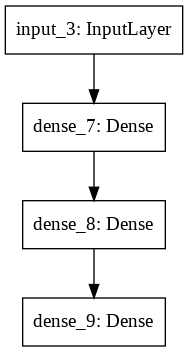

In [ ]:
tf.keras.utils.plot_model(model)

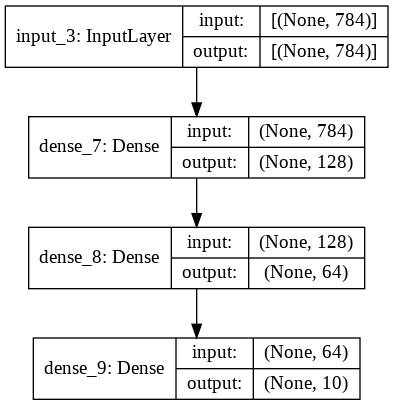

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Train Model

In [ ]:
# load mnist data
(xtrn, ytrn), (xtst, ytst) = tf.keras.datasets.mnist.load_data()

In [ ]:
#preprocess the data
xtrn = xtrn.reshape(60000, 784).astype("float32") / 255
xtst = xtst.reshape(10000, 784).astype("float32") / 255

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(True),
    optimizer = "rmsprop",
    metrics = ["accuracy", tf.keras.metrics.SparseCategoricalCrossentropy("scc error")]
)

In [ ]:
model.fit(xtrn, ytrn, 64, 5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.5016 - accuracy: 0.8548 - scc error: 0.5016 - val_loss: 0.1515 - val_accuracy: 0.9554 - val_scc error: 0.1515
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1394 - accuracy: 0.9579 - scc error: 0.1394 - val_loss: 0.1281 - val_accuracy: 0.9618 - val_scc error: 0.1281
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0951 - accuracy: 0.9707 - scc error: 0.0951 - val_loss: 0.1119 - val_accuracy: 0.9681 - val_scc error: 0.1119
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0710 - accuracy: 0.9790 - scc error: 0.0710 - val_loss: 0.0991 - val_accuracy: 0.9717 - val_scc error: 0.0991
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0538 - accuracy: 0.9837 - scc error: 0.0538 - val_loss: 0.0938 - val_accuracy: 0.9742 - val_scc error: 0.0938


In [ ]:
meter = model.evaluate(xtst, ytst)

313/313 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9767 - scc error: 0.0767


In [ ]:
print(f"loss: {meter[0]}")
print(f"accuracy: {meter[1]}")

loss: 0.07668749988079071
accuracy: 0.9767000079154968


## save and serialize the model

In [ ]:
model.save("functional_model")

INFO:tensorflow:Assets written to: functional_model/assets


#### recreate the model

In [ ]:
new_model = tf.keras.models.load_model("functional_model")

In [ ]:
new_model.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


#Fuctional Api

## Use same layers to define mutliple models

In [ ]:
encoder_input = tf.keras.Input((28, 28, 1))
x = tf.keras.layers.Conv2D(8, 3, activation="relu")(encoder_input)
x = tf.keras.layers.Conv2D(16, 3, activation="relu")(x)
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x)
x = tf.keras.layers.MaxPool2D(3)(x)
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x)
x = tf.keras.layers.Conv2D(16, 3, activation="relu")(x)
x= tf.keras.layers.Conv2D(8, 3, activation="relu")(x)
encoder_output = tf.keras.layers.GlobalMaxPooling2D()(x)

In [ ]:
encoder_model = tf.keras.Model(encoder_input, encoder_output)
encoder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 16)          4624  

In [ ]:
decoder_input = tf.keras.Input((8,))
x = tf.keras.layers.Reshape((1, 8, 1))(decoder_input)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = tf.keras.layers.Conv2DTranspose(1, 3, )(x)
decoder_model = tf.keras.Model(decoder_input, decoder_output)
decoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 8, 1)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 10, 16)         160       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 5, 12, 32)         4640      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 15, 36, 32)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 17, 38, 16)        4624      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 19, 40, 1)         145 

In [ ]:
autoencoder_input = tf.keras.Input(shape=(28, 28, 1))
encoder_img = encoder_model(autoencoder_input)
decoder_img = decoder_model(encoder_img)
autoencoder_model = tf.keras.Model(autoencoder_input, decoder_img)
autoencoder_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 8)                 20920     
_________________________________________________________________
model_1 (Functional)         (None, 19, 40, 1)         9569      
Total params: 30,489
Trainable params: 30,489
Non-trainable params: 0
_________________________________________________________________


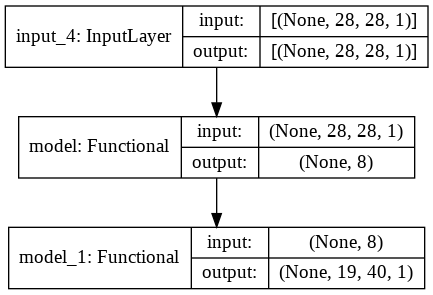

In [ ]:
tf.keras.utils.plot_model(autoencoder_model, show_shapes=True)

In [ ]:
def get_model():
  inputs = tf.keras.Input((128, ))
  dense = tf.keras.layers.Dense(10, "relu")(inputs)
  return tf.keras.Model(inputs, dense)

In [ ]:
inputs = tf.keras.Input((128, ))
m1 = get_model()(inputs)
m2 = get_model()(inputs)
m3 = get_model()(inputs)

In [ ]:
m1, m2, m3

(<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'model_13')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'model_14')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'model_15')>)

In [ ]:
outputs = tf.keras.layers.average([m1, m2, m3])
outputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'average')>

In [ ]:
avg_model = tf.keras.Model(inputs, outputs)
avg_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_13 (Functional)           (None, 10)           1290        input_18[0][0]                   
__________________________________________________________________________________________________
model_14 (Functional)           (None, 10)           1290        input_18[0][0]                   
__________________________________________________________________________________________________
model_15 (Functional)           (None, 10)           1290        input_18[0][0]                   
___________________________________________________________________________________________

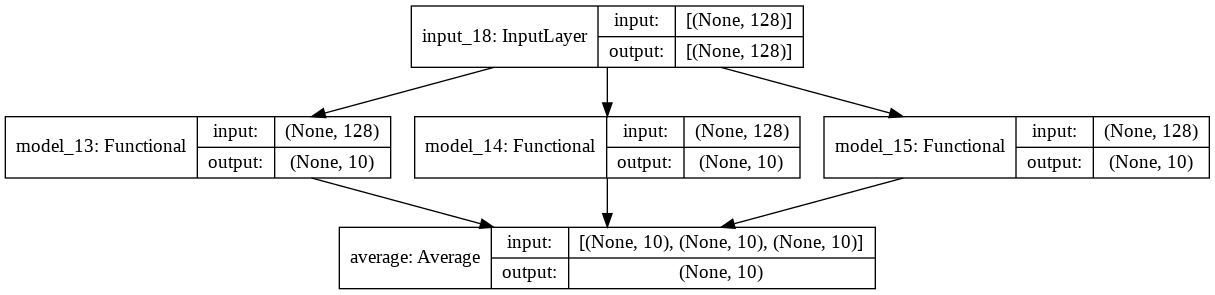

In [ ]:
tf.keras.utils.plot_model(avg_model, show_shapes=True)

In [ ]:
My_model = tf.keras.Sequential([
          tf.keras.Input((28, 28, 1)),
          tf.keras.layers.Conv2D(32, 3, activation="relu"),
          tf.keras.layers.Conv2D(16, 3, activation="relu"),
          tf.keras.layers.Dense(128, activation="relu"),
          tf.keras.layers.Dense(64, activation="relu"),
          tf.keras.layers.Dense(10, activation="softmax")])

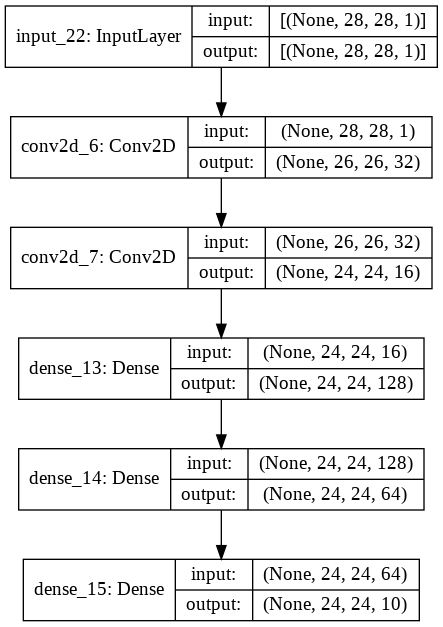

In [ ]:
tf.keras.utils.plot_model(My_model, show_shapes=True)

In [ ]:
import tensorflow as tf
def get_model():
  inputs = tf.keras.Input((128, ), name="First layer")
  x = tf.keras.layers.Dense(10, "relu")(inputs)
  x = tf.keras.layers.Dense(64, activation="relu")(x)
  outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
  return tf.keras.Model(inputs, outputs)

inputs = tf.keras.Input((128, ))
m1 = get_model()(inputs)
m2 = get_model()(inputs)
m3 = get_model()(inputs)

outputs = tf.keras.layers.average([m1, m2, m3])

avg_model = tf.keras.Model(inputs, outputs)
avg_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 10)           2644        input_1[0][0]                    
__________________________________________________________________________________________________
model_1 (Functional)            (None, 10)           2644        input_1[0][0]                    
__________________________________________________________________________________________________
model_2 (Functional)            (None, 10)           2644        input_1[0][0]                    
____________________________________________________________________________________________

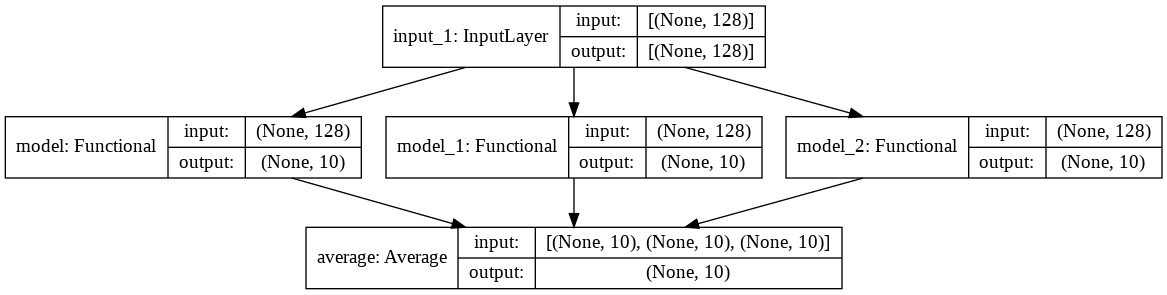

In [ ]:
tf.keras.utils.plot_model(avg_model, show_shapes=True)

# Models with multiple inputs and output

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tkt_class_no = 12
num_words = 10000
num_department = 4

In [ ]:
#create model for classification of customer for customer ticket issueing survice
tkt_title_input = tf.keras.Input((None, ), name="ticket_title")
tkt_desc_input = tf.keras.Input((None, ), name="ticket_description")
tkt_class_input = tf.keras.Input((tkt_class_no, ), name="ticket_tags")

In [ ]:
tkt_title_feature = tf.keras.layers.Embedding(num_words, 128)(tkt_title_input)
tkt_desc_feature = tf.keras.layers.Embedding(num_words, 128)(tkt_desc_input)

In [ ]:
tkt_title_feature = tf.keras.layers.LSTM(128, activation="relu")(tkt_title_feature)
tkt_desc_feature = tf.keras.layers.LSTM(128, activation="relu")(tkt_desc_feature)

In [ ]:
x = tf.keras.layers.concatenate([tkt_title_feature, tkt_desc_feature, tkt_class_input])

In [ ]:
x

<KerasTensor: shape=(None, 268) dtype=float32 (created by layer 'concatenate')>

In [ ]:
layers1 = tf.keras.layers.Dense(128, activation="relu")(x)
layers2 = tf.keras.layers.Dense(64, activation="relu")(layers1)
output_layers = tf.keras.layers.Dense(1)(layers2)

In [ ]:
output_layers

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [ ]:
layers11 = tf.keras.layers.Dense(128, activation="relu")(x)
layers22 = tf.keras.layers.Dense(64, activation="relu")(layers11)
output_layers2 = tf.keras.layers.Dense(num_department)(layers22)

In [ ]:
output_layers2

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_5')>

In [ ]:
model = tf.keras.Model(
    inputs = [tkt_title_input, tkt_desc_input, tkt_class_input],
    outputs = [output_layers, output_layers2],
)

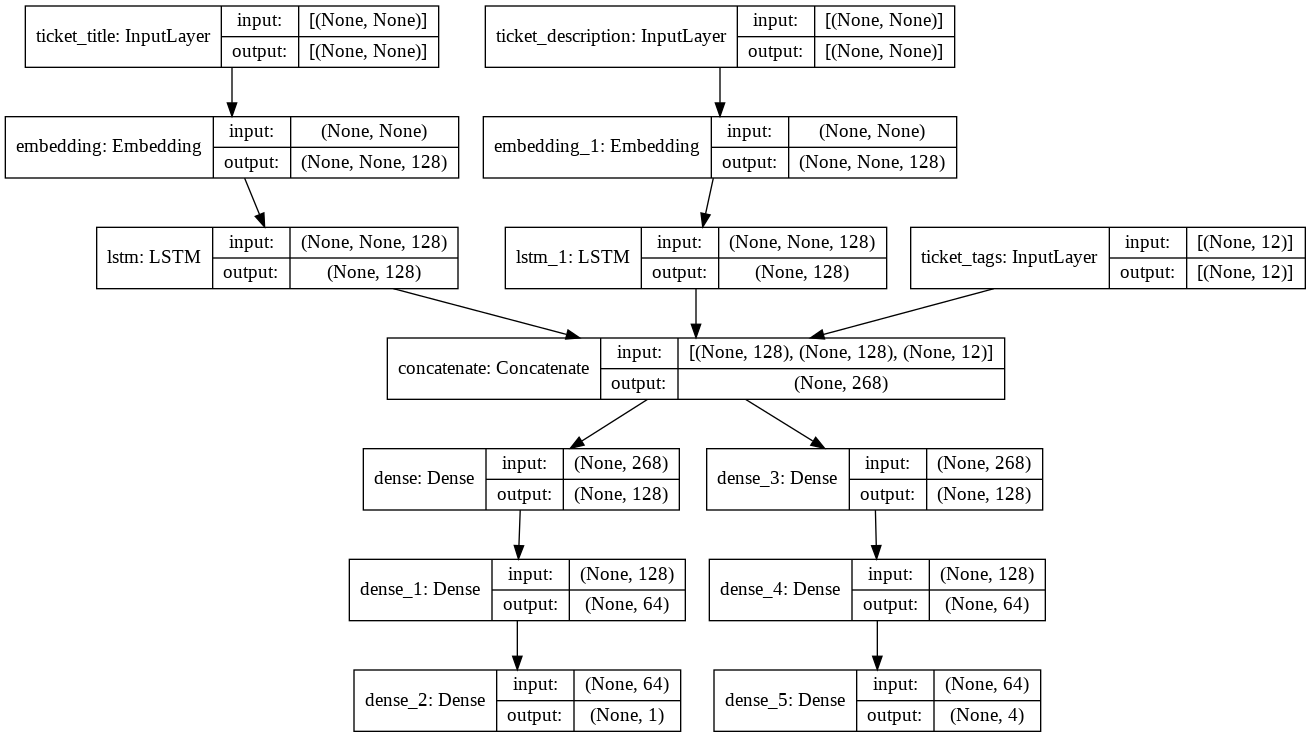

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer = "rmsprop",
    loss = [tf.keras.losses.BinaryCrossentropy(from_logits=True),
            tf.keras.losses.CategoricalCrossentropy(from_logits=True)],
    loss_weights = [1.0, 0.2]
)

In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, tkt_class_no)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_department))

In [ ]:
model.fit([title_data, body_data, tags_data],
          [priority_targets, dept_targets],
          epochs=5,
          batch_size=32)

Epoch 1/5
40/40 [==============================] - 8s 136ms/step - loss: nan - dense_2_loss: nan - dense_5_loss: nan
Epoch 2/5
40/40 [==============================] - 5s 134ms/step - loss: nan - dense_2_loss: nan - dense_5_loss: nan
Epoch 3/5
40/40 [==============================] - 5s 134ms/step - loss: nan - dense_2_loss: nan - dense_5_loss: nan
Epoch 4/5
40/40 [==============================] - 5s 134ms/step - loss: nan - dense_2_loss: nan - dense_5_loss: nan
Epoch 5/5
40/40 [==============================] - 5s 134ms/step - loss: nan - dense_2_loss: nan - dense_5_loss: nan
